### Calling functions in functions
The functions are in the following cells:
1. boxplot - cell number 36
2. histplot - cell number 46

## Hotel Analyzation

### Faigy Mandelbaum
12/28/2022

In this project I am going to explore hotel data, mainly noting differences between resort hotel and city hotel bookings. I will do that so I can find ways to improve indicators and give efficient advice.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from  Project_Funcs import func1, func2

In [2]:
hotels = pd.read_csv('hotel_bookings.csv')

In [3]:
hotels.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
hotels.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
hotels.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
hotels['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [8]:
hotels.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [9]:
hotels['is_canceled'].unique()

array([0, 1], dtype=int64)

In [10]:
def true_false(val):
    if val == 0:
        return False
    elif val == 1:
        return True    


In [11]:
hotels['is_canceled'] = hotels['is_canceled'].apply(true_false)

In [12]:
hotels['is_repeated_guest'] = hotels['is_repeated_guest'].apply(true_false)

In [13]:
hotels['is_canceled'].value_counts()

False    75166
True     44224
Name: is_canceled, dtype: int64

In [14]:
hotels['is_repeated_guest'].value_counts()

False    115580
True       3810
Name: is_repeated_guest, dtype: int64

In [15]:
hotels['children'].fillna(0,inplace = True)
hotels['children'].value_counts()


0.0     110800
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [16]:
hotels['children'].isnull().sum()

0

In [17]:
hotels['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [18]:
hotels['country'].fillna('PRT', inplace=True)

In [19]:
hotels['country'].isnull().sum()

0

In [20]:
hotels = hotels.drop(['agent','company'], axis = 1)

In [21]:
hotels.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [22]:
hotels['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])

In [23]:
hotels['babies'].unique()

array([ 0,  1,  2, 10,  9], dtype=int64)

In [24]:
hotels[hotels['babies']==9]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
78656,City Hotel,False,11,2015,October,42,11,2,1,1,...,B,1,No Deposit,0,Transient-Party,95.0,0,0,Check-Out,2015-10-14


In [25]:
hotels[hotels['babies']==10]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
46619,City Hotel,False,37,2016,January,3,12,0,2,2,...,D,1,No Deposit,0,Transient,84.45,0,1,Check-Out,2016-01-14


In [26]:
hotels[hotels['children']==10.]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
328,Resort Hotel,True,55,2015,July,29,12,4,10,2,...,D,2,No Deposit,0,Contract,133.16,0,1,No-Show,2015-07-12


In [27]:
hotels['previous_cancellations'].unique()

array([ 0,  1,  2,  3, 26, 25, 14,  4, 24, 19,  5, 21,  6, 13, 11],
      dtype=int64)

In [28]:
hotels['previous_cancellations'].value_counts().sort_index()

0     112906
1       6051
2        116
3         65
4         31
5         19
6         22
11        35
13        12
14        14
19        19
21         1
24        48
25        25
26        26
Name: previous_cancellations, dtype: int64

In [29]:
hotels['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10],
      dtype=int64)

In [30]:
hotels[(hotels['stays_in_weekend_nights'] == 0) & (hotels['stays_in_week_nights'] == 0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,False,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,False,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
167,Resort Hotel,False,111,2015,July,28,6,0,0,2,...,H,0,No Deposit,0,Transient,0.0,0,2,Check-Out,2015-07-06
168,Resort Hotel,False,0,2015,July,28,6,0,0,1,...,H,0,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-06
196,Resort Hotel,False,8,2015,July,28,7,0,0,2,...,A,0,No Deposit,0,Transient,0.0,0,1,Check-Out,2015-07-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,City Hotel,False,15,2017,July,27,6,0,0,1,...,A,0,No Deposit,0,Transient-Party,0.0,0,0,Check-Out,2017-07-06
117701,City Hotel,False,0,2017,August,32,8,0,0,2,...,A,0,No Deposit,0,Transient,0.0,0,0,Check-Out,2017-08-08
118029,City Hotel,False,0,2017,August,33,14,0,0,2,...,A,0,No Deposit,0,Transient,0.0,0,0,Check-Out,2017-08-14
118631,City Hotel,False,78,2017,August,34,23,0,0,1,...,K,7,No Deposit,0,Transient-Party,0.0,0,0,Check-Out,2017-08-23


While analyzing the data I realized the following:
1. There are 119,390 hotel bookings and 32 different columns of booking information.
2. There are four columns with missing values, some that are not important at all for our goal.
3. It might be helpfull if the 'is_canceled' and 'is_repeated_guest' columns are turned in to booleans.
4. There are some outliers in the lead time column as we see that most of the information is between 18 and 160 days, while a very smalll percentage is closer to 730 days.
5. The years of the hotel bookings in our data is from 2015 to 2017.
6. Most families that come to the hotels have 0-3 kids with one outlier of a family with ten kids.(Seems like there is no appropriate entertainment for older kids in these hotels.)
This row will have to be removed in order to get more accurate percentages.
7. There are two orders placed where there are a surprising number of babies. I will remove those rows so that it does'nt change the percentage.
8. There are 715 bookings for days only, with no overnights.
9. In general, 75% of each column's information are in the same percentile. The remaining 25% have a wider range of numbers.

In light of the above, I've decided to remove two of the columns: company and agent, which are missing a lot of information. In addition, I replaced the missing values in the country and children columns with the most common value.
I also converted the 'is_canceled' and 'is_repeated_guest' columns into booleans by running a true and false function on them.

### Exploring The Distribution Of Columns

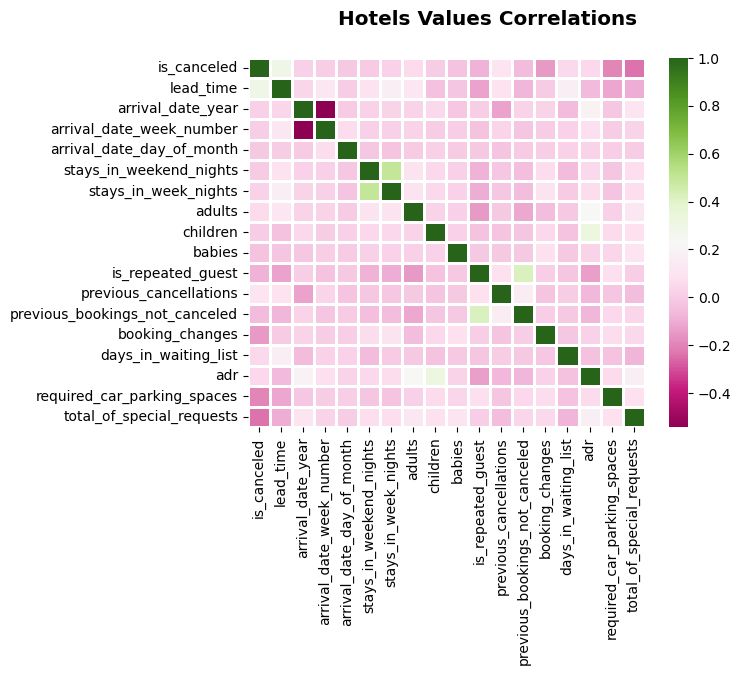

In [31]:
sns.heatmap(hotels.corr(), cmap = 'PiYG',linewidths=0.8)
plt.suptitle('Hotels Values Correlations', weight = 'bold', size = 'x-large')
plt.show()

It seems that there is no strong correlation between columns, aside for a relationship between arrival date week number and the arrival date year. We are continuing to investigate correlations individually.

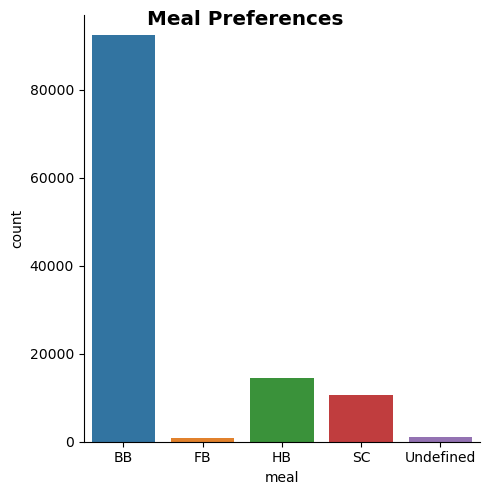

In [32]:
sns.catplot(data = hotels, x = 'meal', kind = 'count')
plt.suptitle('Meal Preferences', weight = 'bold', size = 'x-large')
plt.show()

It is interesting to note that most of the meals ordered are bed & breakfast meals, with exceedingly few of the other meal types.

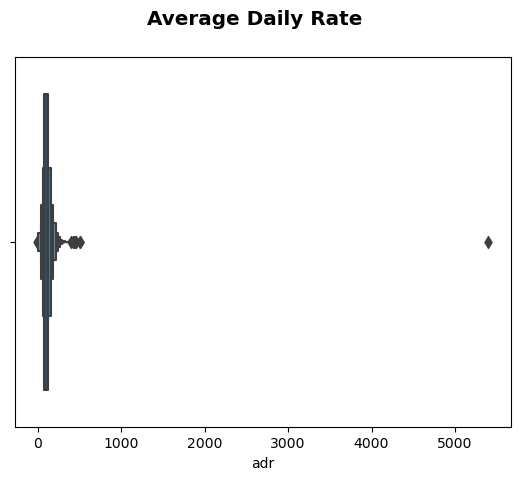

In [33]:
sns.boxenplot(x = hotels['adr'])
plt.suptitle('Average Daily Rate', weight = 'bold', size = 'x-large')
plt.show()

We find an outlier that spent over 5000, while other customers spent significantly less. Therefore, we'll remove that row of data in order to get a clearer picture of the average daily rate. There is another incorrect number that is a negative number; we will remove him too.

In [34]:
hotels = hotels.loc[hotels['adr'] .between (0, 5000)]

In [35]:
hotels.shape

(119388, 30)

62.00     3754
75.00     2715
90.00     2473
65.00     2418
0.00      1959
          ... 
63.07        1
55.69        1
49.51        1
54.64        1
157.71       1
Name: adr, Length: 8877, dtype: int64
The above reflects the range of values for adr column


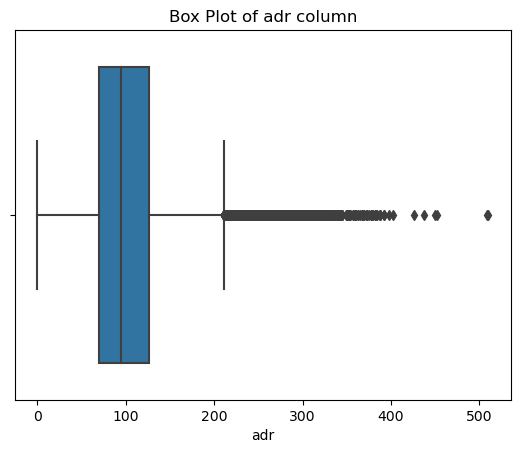

In [36]:
# sns.boxplot(x = hotels['adr'])
# plt.suptitle('Average Daily Rate Of Cleaned Data', weight = 'bold', size = 'x-large')
# plt.show()

func1('adr', hotels)

After removing the outliers we can see that 50% of the customers spent around 100. The other 50% are in the range of 94 to 530.

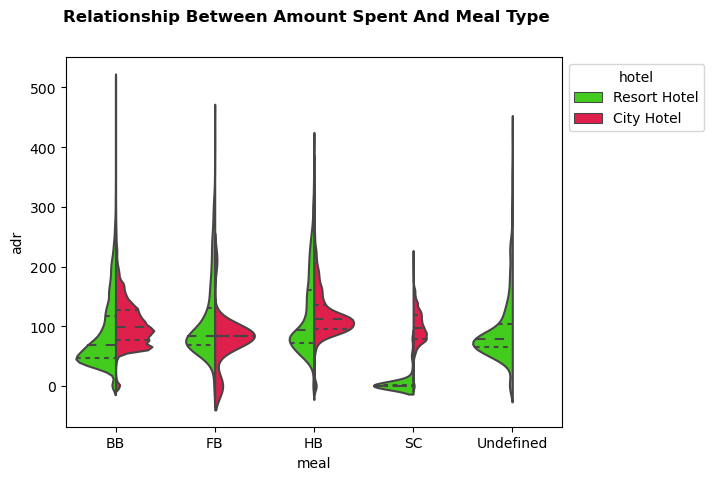

In [37]:
fig=sns.violinplot(x='meal', y='adr', data=hotels, hue="hotel", inner="quartile", split=True, palette="prism")
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.suptitle("Relationship Between Amount Spent And Meal Type", weight="demi")
plt.show()

We find that only the resort hotels have undefined meals. Interesting to notice that the SC which represents no meal ordered, is close to 0 for the Resort hotel and higher up for the city hotel. We also see that in general, the city hotel is more expensive with no correlation to the meal type. The graphs are mostly right skewed.

After doing some research on the meal column, I've reached the conclusion that the rate has nothing to do with the meal type. Therefore, it would be recommended to upgrade the different types of meals so that they will be more in demand. I would also note that it is advisable to check why the resort hotel has many undefined and unordered meals. Perhaps it would be helpful to seriously check the food preparation and presentation in this hotel and make some necessary changes. 

#### Exploring The adr Column

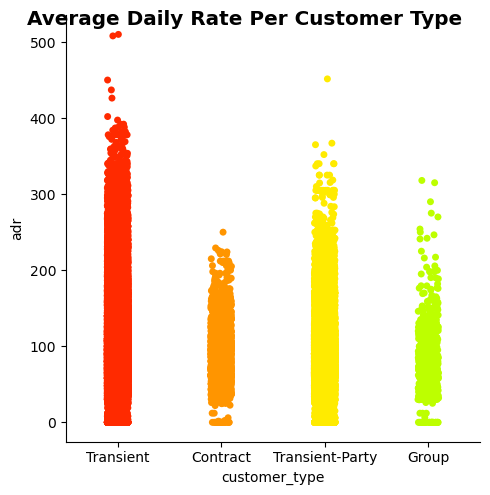

In [38]:
sns.catplot(data = hotels, x = 'customer_type',y = 'adr', palette='prism')
plt.suptitle('Average Daily Rate Per Customer Type', weight = 'bold', size = 'x-large')
plt.show()

We can see that the transient customers paid the highest prices, while contract and group customers pay less. 

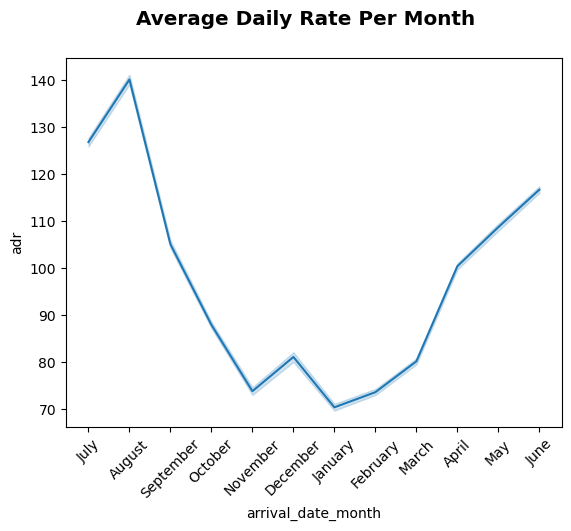

In [39]:
sns.lineplot(data=hotels, x = 'arrival_date_month', y = 'adr')
plt.suptitle('Average Daily Rate Per Month', weight = 'bold', size = 'x-large')
plt.xticks(rotation = 45)
plt.show()

From observing the graph we see that the average daily rate was the absolute highest in August, followed by July and then by June. During the winter months the average daily rate decreases significantly.

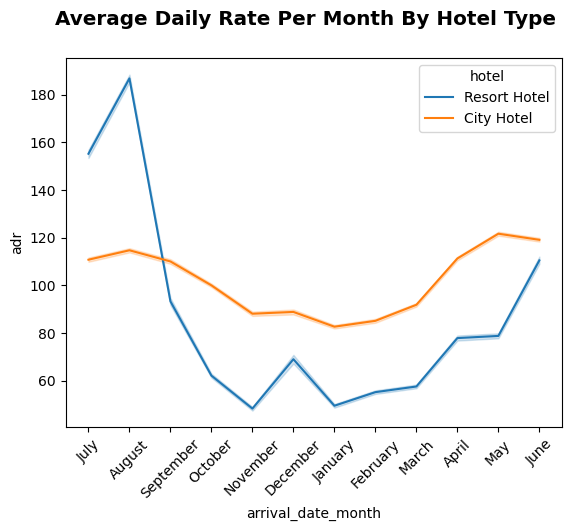

In [40]:
sns.lineplot(data=hotels, x = 'arrival_date_month', y = 'adr', hue= 'hotel')
plt.suptitle('Average Daily Rate Per Month By Hotel Type', weight = 'bold', size = 'x-large')
plt.xticks(rotation = 45)
plt.show()

In the chart above we can see that the city hotel has a more steady pattern when compared to the resort hotel which has more extreme line graphs. The fluctuation in both graphs are relatively similar. The city hotel average daily rate is in the mean area of the resort hotel's range. 

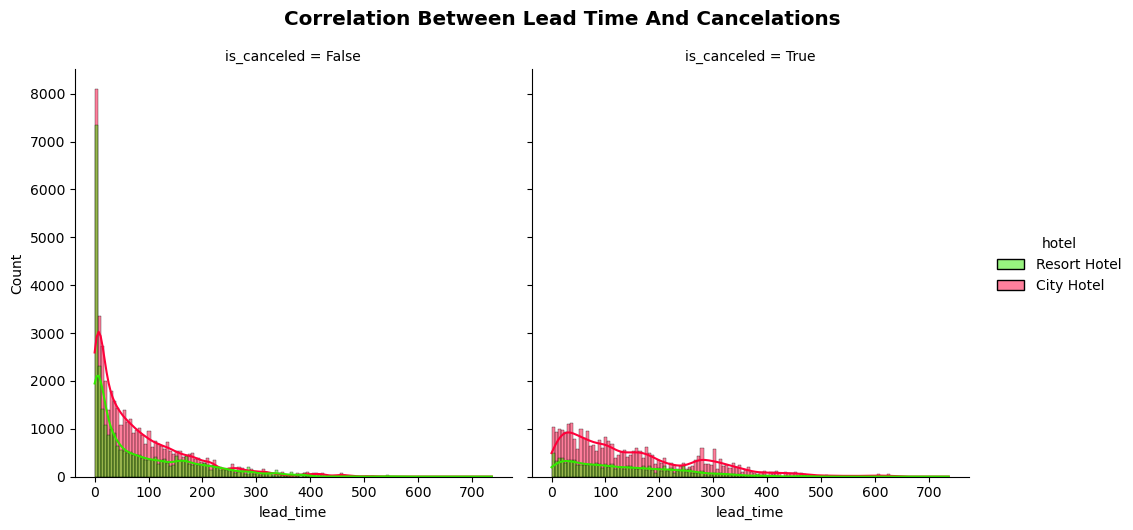

In [41]:
sns.displot(data = hotels, hue = 'hotel', col = 'is_canceled',x = 'lead_time', palette='prism', kde = True)
plt.suptitle('Correlation Between Lead Time And Cancelations', weight = 'bold', size = 'x-large', y = 1.05)
plt.show()

From the right skewed charts above we see that more of the last minute bookings are not canceled. It seems more people book in the city vs. the resort. Its hard to see the people who book very far in advance so we will split the data to see more clearly.

In [42]:
hotels_regular = hotels[hotels['lead_time'] < 365]
hotels_regular.shape

(116175, 30)

In [43]:
hotels_regular_True = hotels_regular[hotels_regular['is_canceled'] == True]
hotels_regular_False = hotels_regular[hotels_regular['is_canceled'] == False]

In [44]:
hotels_advance = hotels[hotels['lead_time'] >= 365 ]
hotels_advance.shape

(3213, 30)

In [45]:
hotels_advance_True = hotels_advance[hotels_advance['is_canceled'] == True]
hotels_advance_False = hotels_advance[hotels_advance['is_canceled'] == False]

Function 2


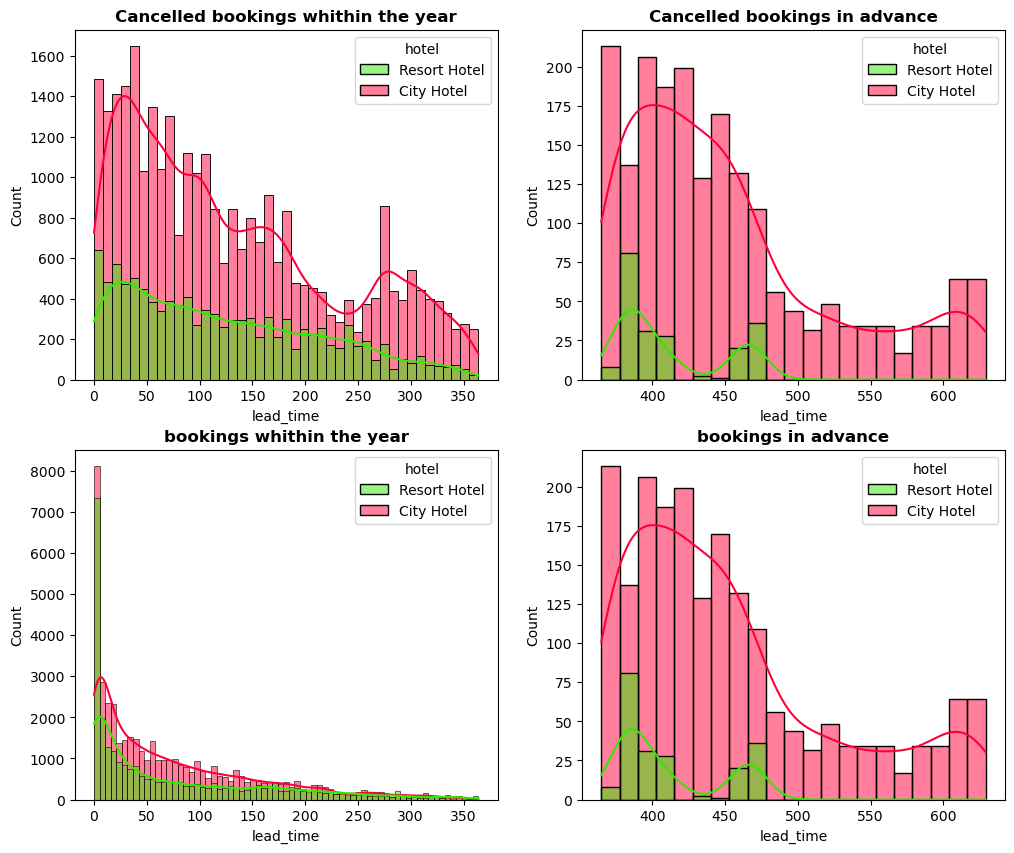

In [46]:
# fig, axes = plt.subplots(2,2, figsize = (14,10))
# sns.histplot(ax = axes[0,0], data = hotels_regular_True, hue = 'hotel',x = 'lead_time', palette='prism', kde = True).set_title('Canceled Bookings Within The Year', weight  = 'demi')
# sns.histplot(ax = axes[0,1], data = hotels_advance_True, hue = 'hotel',x = 'lead_time', palette='prism', kde = True).set_title('Canceled Bookings More Than A Year In Advance', weight  = 'demi')
# sns.histplot(ax = axes[1,0], data = hotels_regular_False, hue = 'hotel',x = 'lead_time', palette='prism', kde = True).set_title('Bookings Within The Year', weight  = 'demi')
# sns.histplot(ax = axes[1,1], data = hotels_advance_False, hue = 'hotel',x = 'lead_time', palette='prism', kde = True).set_title('Bookings More Than A Year In Advance', weight  = 'demi')
# plt.suptitle('Hotel Bookings', weight = 'bold', size = 'xx-large', y = 1)
# plt.show()

func2(0, 1, hotels_regular_True, hotels_advance_True, hotels_regular_False, hotels_advance_True, 'bookings whithin the year', 'bookings in advance')

While analyzing the bookings subplots, we found that those that were made approximately two years in advance and were not(!) canceled were mostly for the resort hotel. The cancelations within the year are double for the city hotel which seems reasonable since the city hotel is more heavily booked. The resort hotel has very few cancelations for bookings that are more than a year in advance. The bookings within the year for both types of hotel have a clear pattern of decrease, which makes us notice that the earlier the booking was made the count is less. The bookings that are more than a year in advance do not show a clear pattern for each of the hotels.

In conclusion:
In this project we cleaned out most of the data and focused on researching the meals in the hotels and their relationship with the average daily rate. We checked the correlation of the average daily rate with some other data too. 
We compared data according to the hotel type and reached a few conclusions:
It would be recommended to investigate the meal packages, especially in the resort hotel. Such a step might pull more customers to the hotel. 
It would also be an idea to check what the reason is that people cancel their bookngs. Perhaps the general service in the hotels need improvement. We see that in each of the hotels there are many cancelations for advanced bookings. That makes us think that people are finding classier hotels in the interim and that might be the reason that they are canceling.
Since the in average daily rate is quite low during the winter months, it would be an optimum time to invest in improving infrastructures.
